In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from funciones_1 import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Diagnóstico de Cancer Mamario
El conjunto de datos de este problema consta de características computadas a partir del procesamiento de imágenes digitales de biopsias de masas mamarias. Esto incluye características relacionadas con el tamaño, la forma y la textura de las células. Además, se incluye el diagnóstico del tumor como benigno o maligno. Para una descripción más detallada del dataset consulte el archivo breast cancer description.md.
En este problema, nuestro objetivo es desarrollar varios modelos para clasificar las masas mamarias de cada paciente como benignas o malignas, y luego evaluar la eficacia de cada uno de estos. Para esto, el conjunto de datos se dividió previamente en uno de entrenamiento (breast cancer train.csv), uno de validación (breast cancer valid.csv) y uno de testeo (breast cancer test.csv).

In [40]:
train = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/1 - Diagnóstico de Cáncer Mamario/breast_cancer_train.csv')
test = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/1 - Diagnóstico de Cáncer Mamario/breast_cancer_test.csv')
validation = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/1 - Diagnóstico de Cáncer Mamario/breast_cancer_valid.csv')

# normalize all data
min_max = get_min_max(train)
train = min_max_normalize(train, min_max)
test = min_max_normalize(test, min_max)
validation = min_max_normalize(validation, min_max)

# if any column has a missing value replace with cero
train = train.fillna(0)
test = test.fillna(0)
validation = validation.fillna(0)

X_train = train.drop(columns=['target'])
y_train = train['target'].values

X_test = test.drop(columns=['target'])
y_test = test['target'].values

X_validation = validation.drop(columns=['target'])
y_validation = validation['target'].values

print("train shape: ", train.shape)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("\ntest shape: ", test.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

print("\nvalidation shape: ", validation.shape)
print("X_validation shape: ", X_validation.shape)
print("y_validation shape: ", y_validation.shape)

# pd.set_option('display.max_columns', None)
# train.head()
# test.head()
validation.head()
# X_train.head()
# y_train

# # show all rows
# pd.set_option('display.max_rows', None)
# train

train shape:  (369, 31)
X_train shape:  (369, 30)
y_train shape:  (369,)

test shape:  (86, 31)
X_test shape:  (86, 30)
y_test shape:  (86,)

validation shape:  (114, 31)
X_validation shape:  (114, 30)
y_validation shape:  (114,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.093785,0.241123,0.094892,0.047241,0.221033,0.249640,0.197329,0.113917,0.575116,0.445010,...,0.294510,0.085202,0.032255,0.306599,0.340070,0.480518,0.294630,0.279322,0.366311,1.0
1,0.407904,0.457558,0.387842,0.269201,0.193775,0.162009,0.077296,0.165159,0.238915,0.142403,...,0.582623,0.352346,0.229853,0.268684,0.133668,0.161501,0.361938,0.272620,0.249915,0.0
2,0.564131,0.299628,0.550514,0.421179,0.424125,0.367509,0.309981,0.447018,0.496360,0.198347,...,0.429638,0.587718,0.476727,0.591688,0.350583,0.429378,0.758708,0.388725,0.236521,0.0
3,0.587639,0.390260,0.582620,0.443062,0.466746,0.481200,0.462512,0.635686,0.596956,0.206400,...,0.360075,0.498246,0.368549,0.460445,0.431816,0.498561,0.881713,0.403706,0.275856,0.0
4,0.681669,0.425093,0.685360,0.530593,0.537120,0.648312,0.658388,0.776342,0.658504,0.335029,...,0.445629,0.597377,0.460848,0.502734,0.594723,0.780717,0.878810,0.446087,0.387080,0.0


## (a)
Derivar la función de costo de “binary cross-entropy” con regularización $L2$ sobre los parámetros $w$, con hiperparámetro $\lambda$, aplicando el principio de máxima verosimilitud sobre el conjunto de entrenamiento.

## (b)
Implementar los siguientes clasificadores, y para cada uno reportar las siguientes métricas de performance: matriz de confusión, accuracy, precision, recall, el gráfico de la curva ROC y área bajo la curva ROC (AUC-ROC), sobre el conjunto de validación:
    
i. Linear Discriminant Analysis (LDA).
    
ii. K-nearest neighbours (KNN), donde el hiperparámetro $k$ es ajustado evaluando el AUC-ROC sobre el conjunto de validación.
    
iii. Regresión logística con regularización $L2$, donde el hiperparámetro $\lambda$ es ajustado evaluando el AUC-ROC sobre el conjunto de validación.

NOTA: en este ejercicio se usa el AUC-ROC como métrica de performance para ajustar los hiperparámetros, pero bien se podría haber usado alguna otra métrica de performance. En general, se deberá usar la métrica que mejor cuantifique la “calidad” de un modelo, lo cual puede variar de un problema a otro, y puede ser una cuestión debatible.

### LDA

In [24]:
# import matplotlib.pyplot as plt
# from sklearn import datasets

# data = datasets.load_iris()
# X, y = data.data, data.target

# # Project the data onto the 2 primary linear discriminants
# lda = LDA(2)
# lda.fit(X, y)
# X_projected = lda.transform(X)

# print("Shape of X:", X.shape)
# print("Shape of transformed X:", X_projected.shape)

# x1, x2 = X_projected[:, 0], X_projected[:, 1]

# plt.scatter(
#     x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
# )

# plt.xlabel("Linear Discriminant 1")
# plt.ylabel("Linear Discriminant 2")
# plt.colorbar()
# plt.show()

In [25]:
lda_model = LDA(n_components=2)
lda_model.fit(X_train, y_train)
lda_transformed_model = lda_model.transform(X_train)

print("LDA shape: ", lda_model.transformed_X.shape)

x0_train, x1_train = lda_model.transformed_X[:, 0], lda_model.transformed_X[:, 1]

lda_transformed_model

LDA shape:  (369, 2)


array([[-6.56206113e-03+0.j, -3.95947830e-02+0.j],
       [ 5.34473464e-03+0.j, -4.36847174e-03+0.j],
       [-1.76029600e-02+0.j, -6.16770812e-02+0.j],
       [-2.13451846e-03+0.j, -3.70340045e-02+0.j],
       [-7.84987993e-03+0.j, -7.13193909e-02+0.j],
       [-1.22953362e-02+0.j, -7.30865688e-02+0.j],
       [-3.47639413e-03+0.j, -2.11630174e-02+0.j],
       [-1.45873280e-03+0.j, -2.72543187e-02+0.j],
       [-5.08086807e-03+0.j, -3.09730696e-02+0.j],
       [-1.92762089e-02+0.j, -2.25299100e-02+0.j],
       [-3.43595853e-03+0.j, -1.29875472e-02+0.j],
       [-2.33184390e-03+0.j, -7.78262567e-03+0.j],
       [-6.07454779e-03+0.j, -1.59414153e-02+0.j],
       [-5.73397858e-03+0.j, -1.35511627e-02+0.j],
       [-1.67882894e-02+0.j, -1.48043256e-02+0.j],
       [-6.15363442e-03+0.j, -1.18618300e-02+0.j],
       [-7.24752427e-04+0.j, -3.13279252e-02+0.j],
       [-9.52860323e-03+0.j, -1.24568142e-02+0.j],
       [-6.03100264e-03+0.j, -1.59169900e-02+0.j],
       [-6.04409517e-03+0.j, -2

/Users/maxi/opt/anaconda3/envs/ml/lib/python3.8/site-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


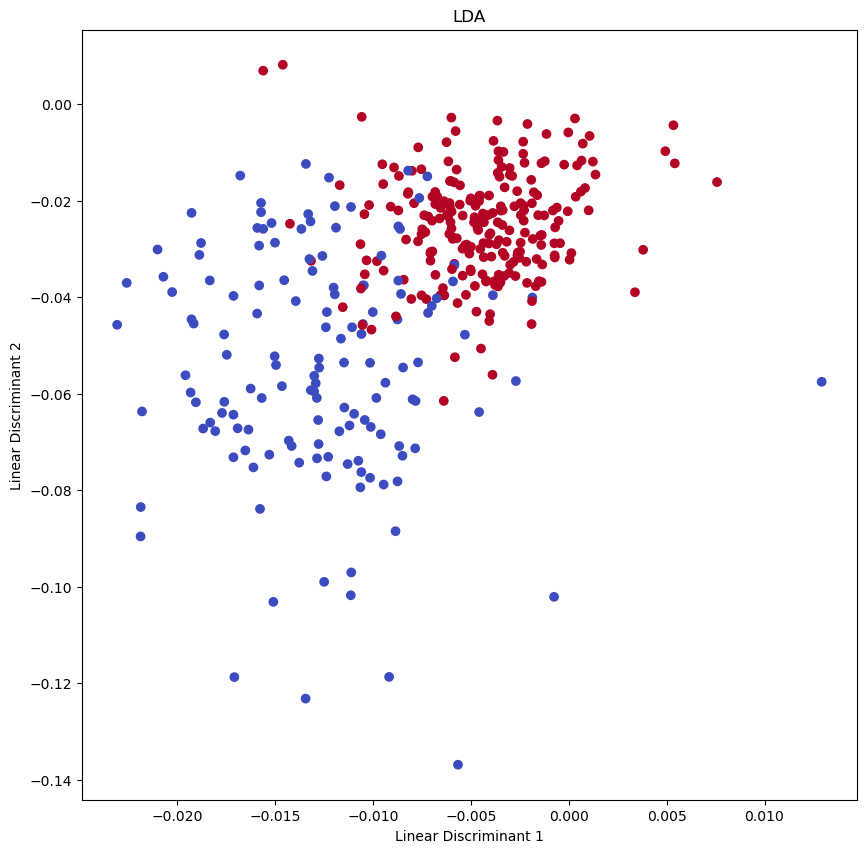

In [26]:
plt.figure(figsize=(10, 10))
# blue and red colors
plt.scatter(x0_train, x1_train, c=y_train, cmap='coolwarm')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.title('LDA')
plt.show()

### KNN

In [27]:
knn_model = KNN(k=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_validation)
knn_confusion_matrix = confusion_matrix(y_validation, y_pred_knn)
knn_accuracy = accuracy(y_validation, y_pred_knn)
knn_precision = precision(y_validation, y_pred_knn)
knn_recall = recall(y_validation, y_pred_knn)
knn_f1 = f1(y_validation, y_pred_knn)

print("KNN confusion matrix: \n", knn_confusion_matrix)
print("KNN accuracy: ", knn_accuracy)
print("KNN precision: ", knn_precision)
print("KNN recall: ", knn_recall)
print("KNN f1: ", knn_f1)

KNN confusion matrix: 
 (70, 39, 1, 4)
KNN accuracy:  0.956140350877193
KNN precision:  0.9859154929577465
KNN recall:  0.9459459459459459
KNN f1:  0.9655172413793103


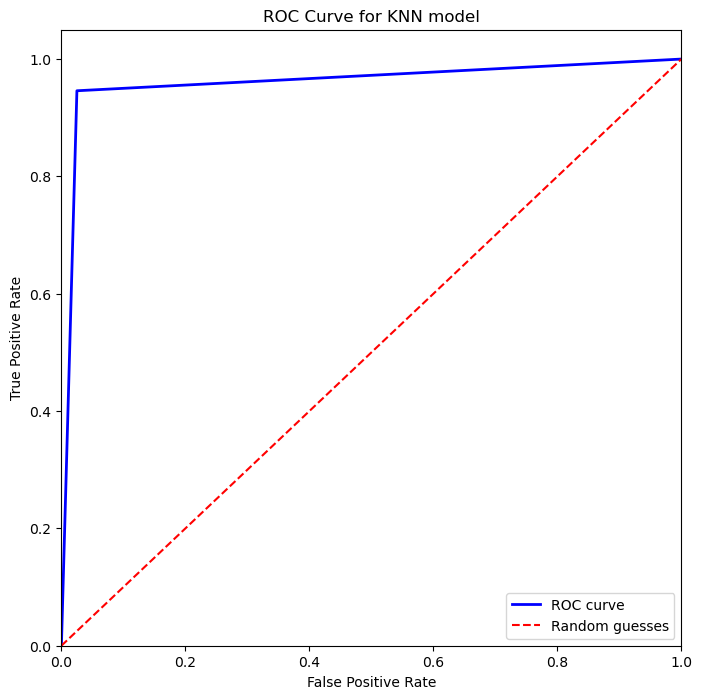

In [28]:
# ROC curve
fpr, tpr= roc_curve(y_validation, y_pred_knn, plot=True, model_name='KNN model')


TPR:  [0.918918918918919, 0.918918918918919, 0.9459459459459459, 0.9459459459459459, 0.9459459459459459, 0.9459459459459459, 0.9594594594594594, 0.9459459459459459, 0.9594594594594594, 0.9594594594594594, 0.9594594594594594, 0.9594594594594594, 0.972972972972973, 0.972972972972973, 0.972972972972973, 0.972972972972973, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865, 0.9864864864864865]
FPR:  [0.05, 0.05, 

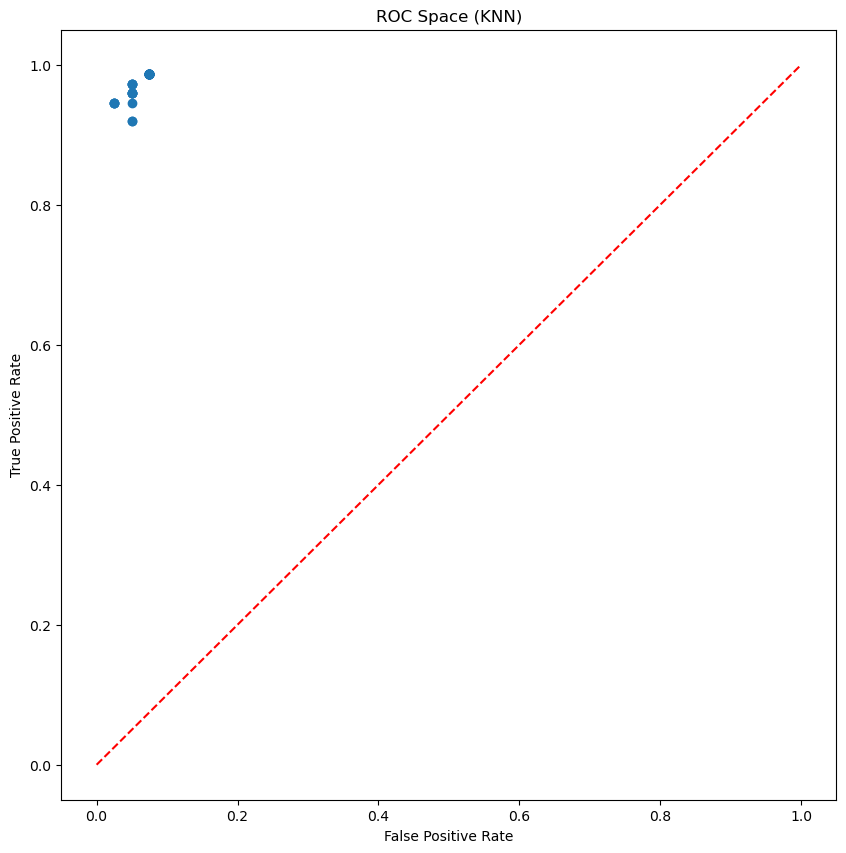

Best k:  13


In [29]:
TPR = []
FPR = []

for i in range(1, 50):
    knn_model = KNN(k=i)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_validation)
    
    roc_values = roc(y_validation, y_pred_knn)
    TPR.append(roc_values[0])
    FPR.append(roc_values[1])

print("TPR: ", TPR)
print("FPR: ", FPR)

# plot ROC Space
plt.figure(figsize=(10, 10))
plt.scatter(FPR, TPR)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Space (KNN)')
plt.show()

# Find the best k
best_k = np.argmax([TPR[i]-FPR[i] for i in range(len(TPR))]) + 1
print("Best k: ", best_k)

KNN confusion matrix: 
 (72, 38, 2, 2)
KNN accuracy:  0.9649122807017544
KNN precision:  0.972972972972973
KNN recall:  0.972972972972973
KNN f1:  0.972972972972973


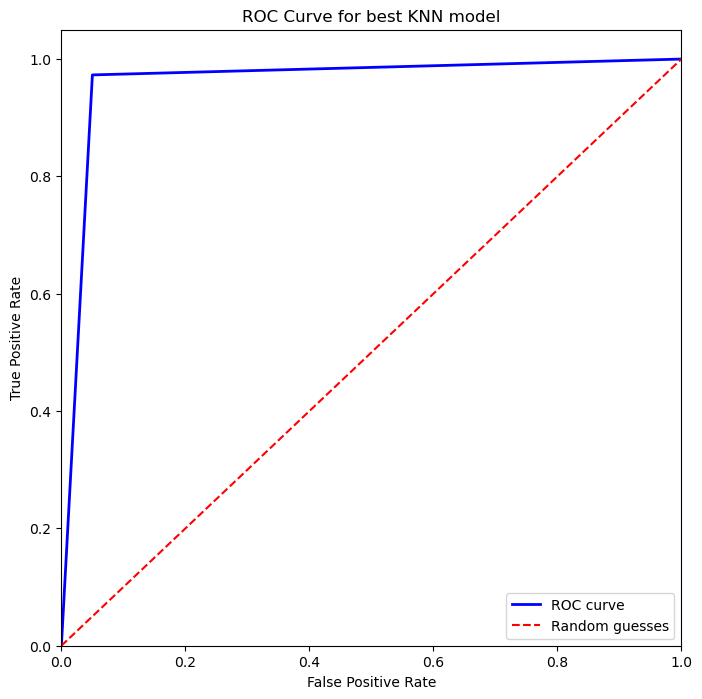

In [30]:
# Train the model with the best k and show results in the validation set

knn_best_model = KNN(k=best_k)
knn_best_model.fit(X_train, y_train)

y_pred_knn = knn_best_model.predict(X_validation)
knn_confusion_matrix = confusion_matrix(y_validation, y_pred_knn)
knn_accuracy = accuracy(y_validation, y_pred_knn)
knn_precision = precision(y_validation, y_pred_knn)
knn_recall = recall(y_validation, y_pred_knn)
knn_f1 = f1(y_validation, y_pred_knn)

print("KNN confusion matrix: \n", knn_confusion_matrix)
print("KNN accuracy: ", knn_accuracy)
print("KNN precision: ", knn_precision)
print("KNN recall: ", knn_recall)
print("KNN f1: ", knn_f1)

# roc curve
knn_fpr, knn_tpr = roc_curve(y_validation, y_pred_knn, plot=True, model_name='best KNN model')


KNN confusion matrix test: 
 (53, 27, 4, 2)
KNN accuracy test:  0.9302325581395349
KNN precision test:  0.9298245614035088
KNN recall test:  0.9636363636363636
KNN f1 test:  0.9464285714285715


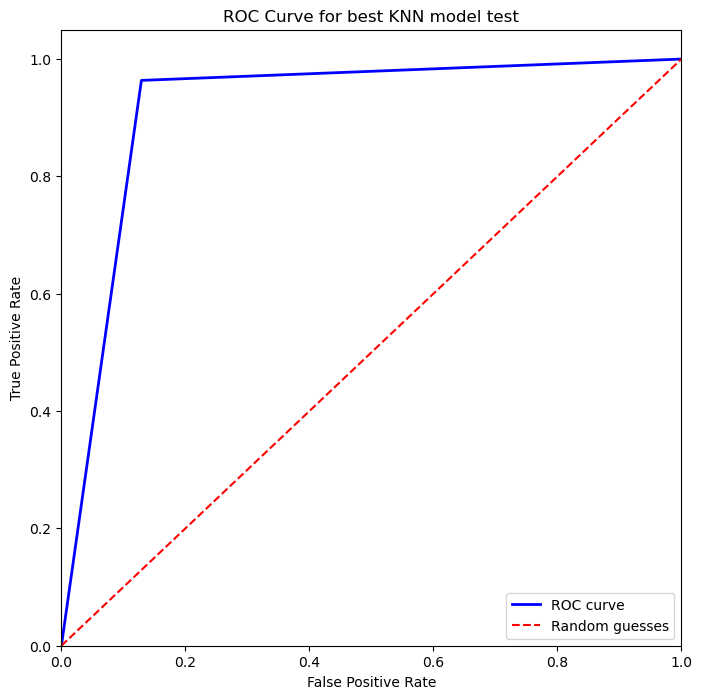

In [31]:
# results in the test set
y_pred_knn = knn_best_model.predict(X_test)
knn_confusion_matrix_test = confusion_matrix(y_test, y_pred_knn)
knn_accuracy_test = accuracy(y_test, y_pred_knn)
knn_precision_test = precision(y_test, y_pred_knn)
knn_recall_test = recall(y_test, y_pred_knn)
knn_f1_test = f1(y_test, y_pred_knn)

print("KNN confusion matrix test: \n", knn_confusion_matrix_test)
print("KNN accuracy test: ", knn_accuracy_test)
print("KNN precision test: ", knn_precision_test)
print("KNN recall test: ", knn_recall_test)
print("KNN f1 test: ", knn_f1_test)

# roc curve
knn_fpr_test, knn_tpr_test = roc_curve(y_test, y_pred_knn, plot=True, model_name='best KNN model test')

### Logistic Regression

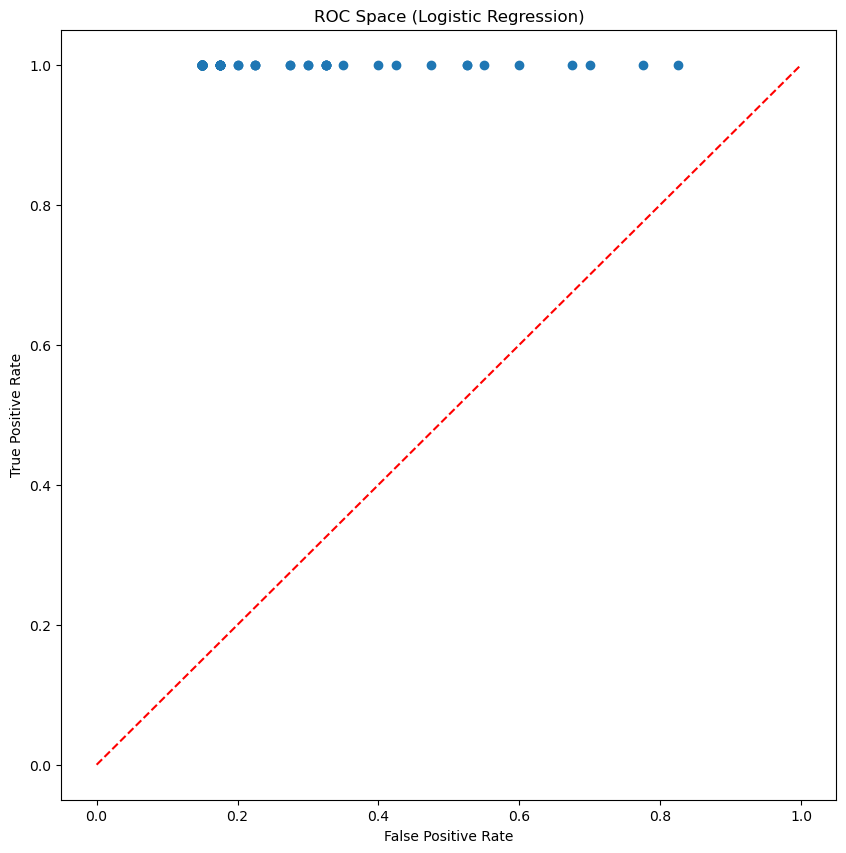

Best lambda:  0.01


In [32]:
TPR = []
FPR = []
lmbdas = np.logspace(-2, 2, 100)

for lam in lmbdas:
    logr_model = LogisticRegression(lmbda=lam)
    logr_model.fit(X_train, y_train)
    y_pred_logr = logr_model.predict(X_validation)
    
    roc_values = roc(y_validation, y_pred_logr)
    TPR.append(roc_values[0])
    FPR.append(roc_values[1])

# print("TPR: ", TPR)
# print("FPR: ", FPR)

# plot ROC Space
plt.figure(figsize=(10, 10))
plt.scatter(FPR, TPR)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Space (Logistic Regression)')
plt.show()

# Find the best lambda
best_lam = lmbdas[np.argmax([TPR[i]-FPR[i] for i in range(len(TPR))])]
print("Best lambda: ", best_lam)

Logistic Regression confusion matrix: 
 (74, 34, 6, 0)
Logistic Regression accuracy:  0.9473684210526315
Logistic Regression precision:  0.925
Logistic Regression recall:  1.0
Logistic Regression f1:  0.961038961038961


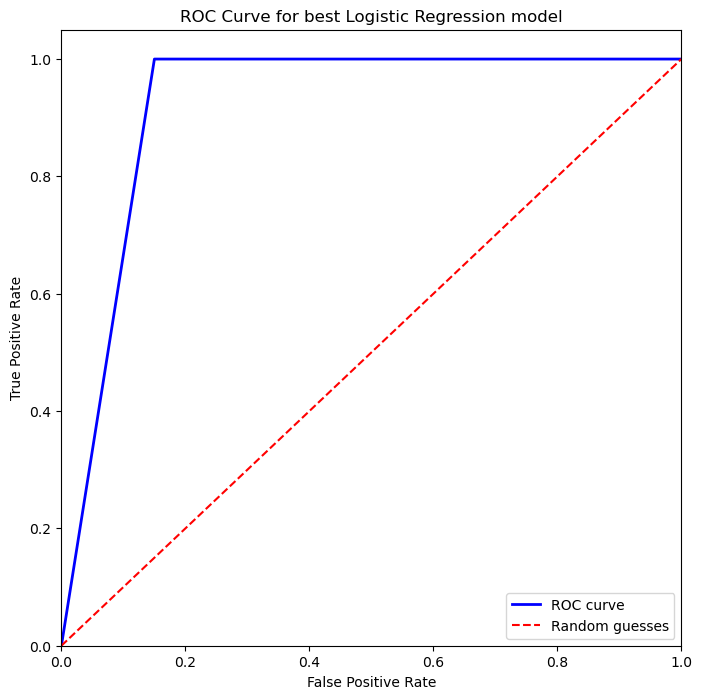

In [33]:
# Train the model with the best lambda and show results in the validation set

logr_best_model = LogisticRegression(lmbda=best_lam)
logr_best_model.fit(X_train, y_train)

y_pred_logr = logr_best_model.predict(X_validation)
logr_confusion_matrix = confusion_matrix(y_validation, y_pred_logr)
logr_accuracy = accuracy(y_validation, y_pred_logr)
logr_precision = precision(y_validation, y_pred_logr)
logr_recall = recall(y_validation, y_pred_logr)
logr_f1 = f1(y_validation, y_pred_logr)

print("Logistic Regression confusion matrix: \n", logr_confusion_matrix)
print("Logistic Regression accuracy: ", logr_accuracy)
print("Logistic Regression precision: ", logr_precision)
print("Logistic Regression recall: ", logr_recall)
print("Logistic Regression f1: ", logr_f1)

# roc curve
logr_fpr, logr_tpr = roc_curve(y_validation, y_pred_logr, plot=True, model_name='best Logistic Regression model')

Logistic Regression confusion matrix test: 
 (54, 25, 6, 1)
Logistic Regression accuracy test:  0.9186046511627907
Logistic Regression precision test:  0.9
Logistic Regression recall test:  0.9818181818181818
Logistic Regression f1 test:  0.9391304347826087


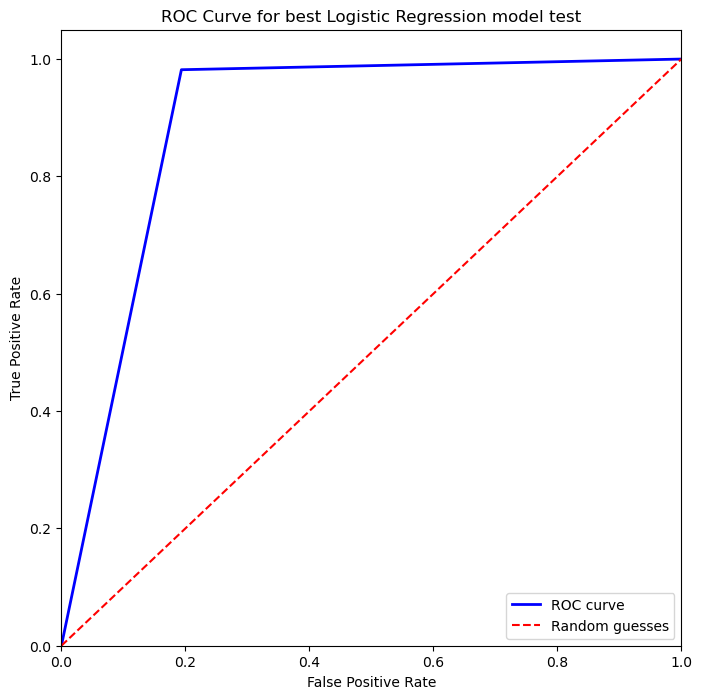

In [34]:
# logistic regression results in the test set
y_pred_logr = logr_best_model.predict(X_test)
logr_confusion_matrix_test = confusion_matrix(y_test, y_pred_logr)
logr_accuracy_test = accuracy(y_test, y_pred_logr)
logr_precision_test = precision(y_test, y_pred_logr)
logr_recall_test = recall(y_test, y_pred_logr)
logr_f1_test = f1(y_test, y_pred_logr)

print("Logistic Regression confusion matrix test: \n", logr_confusion_matrix_test)
print("Logistic Regression accuracy test: ", logr_accuracy_test)
print("Logistic Regression precision test: ", logr_precision_test)
print("Logistic Regression recall test: ", logr_recall_test)
print("Logistic Regression f1 test: ", logr_f1_test)

# roc curve
logr_fpr_test, logr_tpr_test = roc_curve(y_test, y_pred_logr, plot=True, model_name='best Logistic Regression model test')

## (c)
Una vez que haya desarrollado todos los modelos y este satisfecho con la performance de cada uno, evalúe las métricas de performance antes mencionadas para cada uno de los clasificadores desarrollados, mediante validación cruzada con 5 folds (en este caso, se deben juntar los conjuntos de entrenamiento y validación, y hacer validación cruzada sobre estos) y mediante evaluación sobre el test set.
Comparar los resultados con las métricas reportadas en el inciso anterior, y analizar cualquier diferencia que se observe. En el caso de las métricas escalares, arme una tabla que muestre las métricas evaluadas de las tres maneras distintas (validación, test y validación cruzada). En el caso de las curvas AUC-ROC, hacer un gráfico mostrando las distintas curvas.

In [35]:
# join train and validation sets
X_train_ = pd.concat([X_train, X_validation])
y_train = np.concatenate([y_train, y_validation])

# duda: train y test split en el k-folds si junto train y validation
# no entiendo si tengo que hacer el k-folds y medir el performance o si
# tengo que hacer k-folds para elegir los parametros y luego medir el performance

In [36]:
# cross validation for KNN
knn_cv_accuracy, knn_cv_precision, knn_cv_recall, knn_cv_f1 = k_folds_cross_validation(X_train_, y_train, knn_best_model)
print("KNN cross validation accuracy: ", knn_cv_accuracy)
print("KNN cross validation precision: ", knn_cv_precision)
print("KNN cross validation recall: ", knn_cv_recall)
print("KNN cross validation f1: ", knn_cv_f1)


KNN cross validation accuracy:  0.9625
KNN cross validation precision:  0.9474837566352086
KNN cross validation recall:  0.9927997428479589
KNN cross validation f1:  0.9693528001754379


In [37]:
# cross validation for Logistic Regression
logr_cv_accuracy, logr_cv_precision, logr_cv_recall, logr_cv_f1 = k_folds_cross_validation(X_train_, y_train, logr_best_model)
print("Logistic Regression cross validation accuracy: ", logr_cv_accuracy)
print("Logistic Regression cross validation precision: ", logr_cv_precision)
print("Logistic Regression cross validation recall: ", logr_cv_recall)
print("Logistic Regression cross validation f1: ", logr_cv_f1)

Logistic Regression cross validation accuracy:  0.9125
Logistic Regression cross validation precision:  0.8830247873746414
Logistic Regression cross validation recall:  0.9904713114754099
Logistic Regression cross validation f1:  0.9329297019635281


In [38]:
# KNN
knn_results = pd.DataFrame(data=[ [knn_accuracy, knn_precision, knn_recall, knn_f1],
                                  [knn_accuracy_test, knn_precision_test, knn_recall_test, knn_f1_test],
                                  [knn_cv_accuracy, knn_cv_precision, knn_cv_recall, knn_cv_f1]],
                                columns=['accuracy', 'precision', 'recall', 'f1'],
                                index=['validation', 'test', 'cross validation'])

# Logistic Regression
logr_results = pd.DataFrame(data=[ [logr_accuracy, logr_precision, logr_recall, logr_f1],
                                   [logr_accuracy_test, logr_precision_test, logr_recall_test, logr_f1_test],
                                   [logr_cv_accuracy, logr_cv_precision, logr_cv_recall, logr_cv_f1]],
                                columns=['accuracy', 'precision', 'recall', 'f1'],
                                index=['validation', 'test', 'cross validation'])

print("KNN results: \n")
knn_results

KNN results: 



,accuracy,precision,recall,f1
validation,0.964912,0.972973,0.972973,0.972973
test,0.930233,0.929825,0.963636,0.946429
cross validation,0.962500,0.947484,0.992800,0.969353


In [39]:
print("Logistic Regression results: \n")
logr_results

Logistic Regression results: 



,accuracy,precision,recall,f1
validation,0.947368,0.925000,1.000000,0.961039
test,0.918605,0.900000,0.981818,0.939130
cross validation,0.912500,0.883025,0.990471,0.932930
